## QBUS6840 - Assignment

### 1. Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as smt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# load data
df_raw = pd.read_csv('data/UnderemploymentRate_InSample.csv')

display(df_raw.info())
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  475 non-null    object 
 1   Underemployment Rate  475 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB


None

,Date,Underemployment Rate
0,1/06/1978,4.270054
1,1/07/1978,3.933794
2,1/08/1978,4.045333
3,1/09/1978,3.999336
4,1/10/1978,3.722322


In [4]:
df_raw.tail()

,Date,Underemployment Rate
470,1/08/2017,4.348083
471,1/09/2017,4.152602
472,1/10/2017,4.058758
473,1/11/2017,3.982008
474,1/12/2017,4.070490


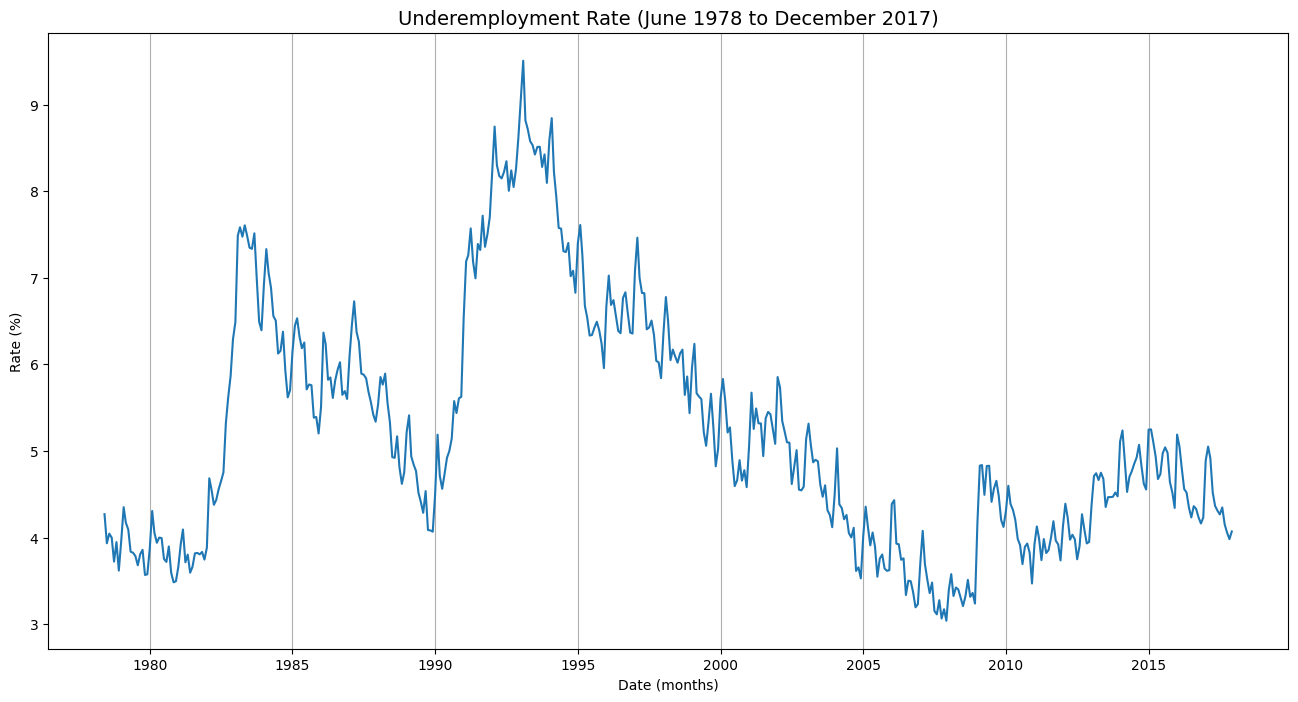

In [28]:
# Convert Date to datetime and set as index
df_ts = df_raw.copy()
df_ts['Date'] = pd.to_datetime(df_ts['Date'], format="%d/%m/%Y") # Fix format to day-month-year
df_ts = df_ts.set_index('Date')

# Plot the training dataset
plt.figure(figsize=(16,8))
plt.title('Underemployment Rate (June 1978 to December 2017)', fontsize=14)
plt.xlabel('Date (months)', fontsize=10)
plt.ylabel('Rate (%)', fontsize=10)

plt.gca().xaxis.grid(True)
plt.plot(df_ts.index, df_ts['Underemployment Rate'])

plt.show()

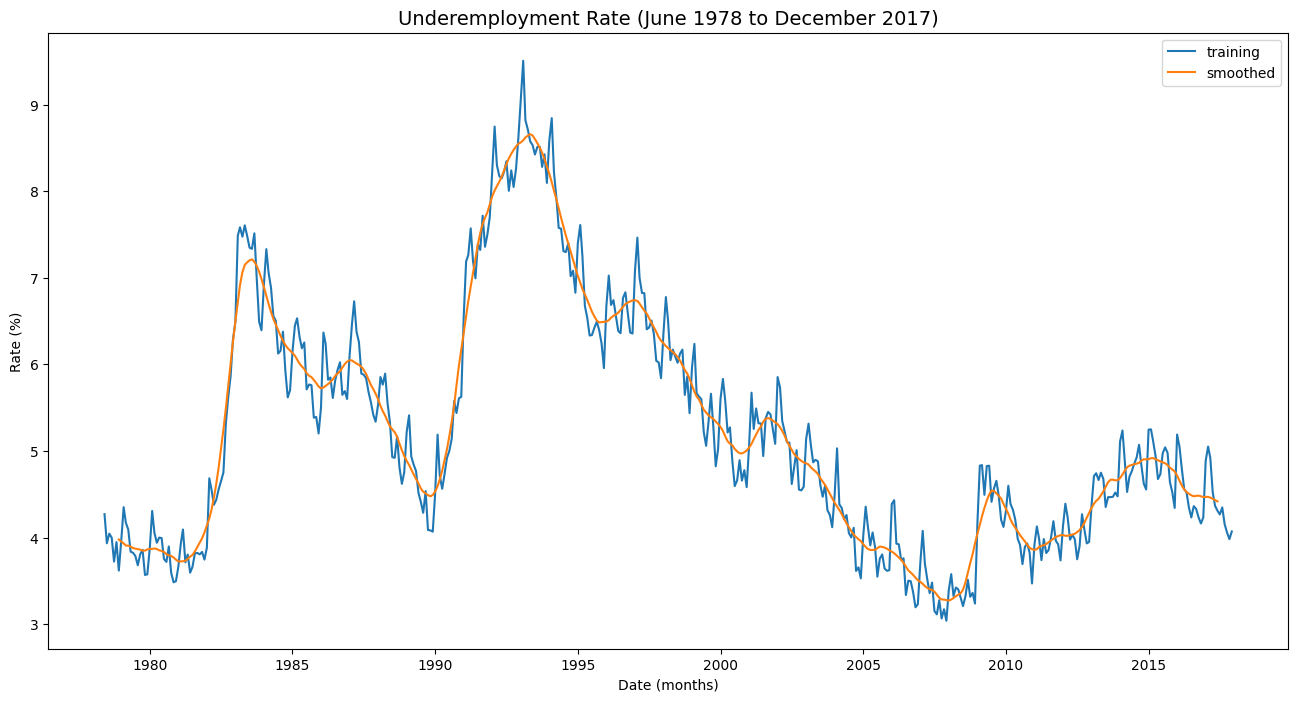

In [33]:
# Can observe an annaul trend, with a peak in January and trough in December
# Let's smooth the plot

df_smoothed = df_ts.rolling(12, center=True).mean().rolling(2, center=True).mean().shift(-1)

# Plot the training dataset
plt.figure(figsize=(16,8))
plt.title('Underemployment Rate (June 1978 to December 2017)', fontsize=14)
plt.xlabel('Date (months)', fontsize=10)
plt.ylabel('Rate (%)', fontsize=10)

plt.plot(df_ts.index, df_ts['Underemployment Rate'], label='training')
plt.plot(df_smoothed.index, df_smoothed['Underemployment Rate'], label='smoothed')

plt.legend()
plt.show()

In [34]:
for x, y in zip(df_ts['Underemployment Rate'], df_smoothed['Underemployment Rate']):
    print(x, y)

4.270053688 nan
3.93379361 nan
4.045332661 nan
3.999335945 nan
3.722322069 nan
3.94744027 nan
3.618256367 3.9773969763333334
3.962852036 3.9526983304166667
4.351049618 3.931347799625
4.171866366 3.9081803460416666
4.092223579 3.905890373208333
3.837195444 3.8957163449166665
3.824137814 3.8781149045000003
3.786941982 3.8725702551250003
3.67977155 3.8669748943749997
3.80887817 3.860170958833333
3.857820496 3.8488388308749997
3.567765164 3.8492409901249998
3.575496903 3.8630676388333334
3.872539915 3.868721906
4.307073081 3.868924202583333
4.05254845 3.874212039125
3.939570424 3.8669061964583333
3.999500421 3.8523956996249997
3.993672406 3.8455524574166664
3.753109802 3.8335647721666666
3.718458848 3.8090898514166667
3.897098949 3.794975500875
3.594259493 3.7872745156249996
3.483074243 3.7697075174166668
3.495950011 3.7448829652083333
3.664382361 3.724440777041667
3.927832537 3.724766878416667
4.093044581 3.7257892493750004
3.714250647 3.731496307916667
3.803212241 3.754912873166667
3.594